In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()  # Aquí selecciona tu kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kimo1723","key":"3102c651d18249eed0290e41613d50d3"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d cooperunion/anime-recommendations-database


Dataset URL: https://www.kaggle.com/datasets/cooperunion/anime-recommendations-database
License(s): CC0-1.0
  0% 0.00/25.0M [00:00<?, ?B/s]
100% 25.0M/25.0M [00:00<00:00, 932MB/s]


In [5]:
!unzip anime-recommendations-database.zip -d ./data

Archive:  anime-recommendations-database.zip
  inflating: ./data/anime.csv        
  inflating: ./data/rating.csv       


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Cargar los datasets
anime = pd.read_csv("./data/anime.csv")
ratings = pd.read_csv("./data/rating.csv")

# Mostrar dimensiones
print("Anime dataset:", anime.shape)
print("Ratings dataset:", ratings.shape)

# Primeras filas
display(anime.head())
display(ratings.head())

Anime dataset: (12294, 7)
Ratings dataset: (7813737, 3)


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [9]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [10]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [14]:
ratings_reducido = ratings.sample(frac=0.5, random_state=42).reset_index(drop=True)

print("Tamaño original:", ratings.shape)
print("Tamaño reducido:", ratings_reducido.shape)

Tamaño original: (7813737, 3)
Tamaño reducido: (3906868, 3)


# Análisis Exploratorio

In [15]:
sns.set(style="whitegrid")

In [16]:
print("Anime dataset:", anime.shape)
print("Ratings reducido dataset:", ratings_reducido.shape)

display(anime.head())
display(ratings_reducido.head())

Anime dataset: (12294, 7)
Ratings reducido dataset: (3906868, 3)


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


,user_id,anime_id,rating
0,73424,7785,10
1,59789,19769,6
2,55960,59,10
3,71461,3342,10
4,55390,986,8


In [17]:
print("=== Anime info ===")
print(anime.info())
print("\nValores nulos en anime:\n", anime.isnull().sum())

print("\n=== Ratings reducido info ===")
print(ratings_reducido.info())
print("\nValores nulos en ratings reducido:\n", ratings_reducido.isnull().sum())

=== Anime info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None

Valores nulos en anime:
 anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

=== Ratings reducido info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3906868 entries, 0 to 3906867
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 89.4 MB
None

Valores n

In [18]:
print("=== Estadísticas Anime ===")
display(anime.describe(include="all"))

print("=== Estadísticas Ratings Reducido ===")
display(ratings_reducido.describe())

=== Estadísticas Anime ===


,anime_id,name,genre,type,episodes,rating,members
count,12294.000000,12294,12232,12269,12294,12064.000000,1.229400e+04
unique,NaN,12292,3264,6,187,NaN,NaN
top,NaN,Saru Kani Gassen,Hentai,TV,1,NaN,NaN
freq,NaN,2,823,3787,5677,NaN,NaN
mean,14058.221653,NaN,NaN,NaN,NaN,6.473902,1.807134e+04
std,11455.294701,NaN,NaN,NaN,NaN,1.026746,5.482068e+04
min,1.000000,NaN,NaN,NaN,NaN,1.670000,5.000000e+00
25%,3484.250000,NaN,NaN,NaN,NaN,5.880000,2.250000e+02
50%,10260.500000,NaN,NaN,NaN,NaN,6.570000,1.550000e+03
75%,24794.500000,NaN,NaN,NaN,NaN,7.180000,9.437000e+03


=== Estadísticas Ratings Reducido ===


,user_id,anime_id,rating
count,3.906868e+06,3.906868e+06,3.906868e+06
mean,3.673322e+04,8.905040e+03,6.144484e+00
std,2.100297e+04,8.883733e+03,3.727826e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897500e+04,1.241000e+03,6.000000e+00
50%,3.679100e+04,6.211000e+03,7.000000e+00
75%,5.477400e+04,1.407500e+04,9.000000e+00
max,7.351500e+04,3.451900e+04,1.000000e+01


In [19]:
# Copiamos para no alterar los originales
anime_clean = anime.copy()
ratings_clean = ratings_reducido.copy()

# === LIMPIEZA ANIME ===
# Imputar géneros y tipo con "Unknown"
anime_clean["genre"] = anime_clean["genre"].fillna("Unknown")
anime_clean["type"] = anime_clean["type"].fillna("Unknown")

# Convertir episodios a numérico (con errores como NaN → los rellenamos con -1)
anime_clean["episodes"] = pd.to_numeric(anime_clean["episodes"], errors="coerce")
anime_clean["episodes"] = anime_clean["episodes"].fillna(-1).astype(int)

# Imputar rating con la media
anime_mean_rating = anime_clean["rating"].mean()
anime_clean["rating"] = anime_clean["rating"].fillna(anime_mean_rating)

# Confirmamos limpieza
print("Valores nulos en anime_clean:\n", anime_clean.isnull().sum())


Valores nulos en anime_clean:
 anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64


In [20]:
# === LIMPIEZA RATINGS ===
# Eliminamos filas con rating = -1 (usuarios que no calificaron)
ratings_clean = ratings_clean[ratings_clean["rating"] != -1]

print("Tamaño después de limpiar ratings:", ratings_clean.shape)

Tamaño después de limpiar ratings: (3168710, 3)


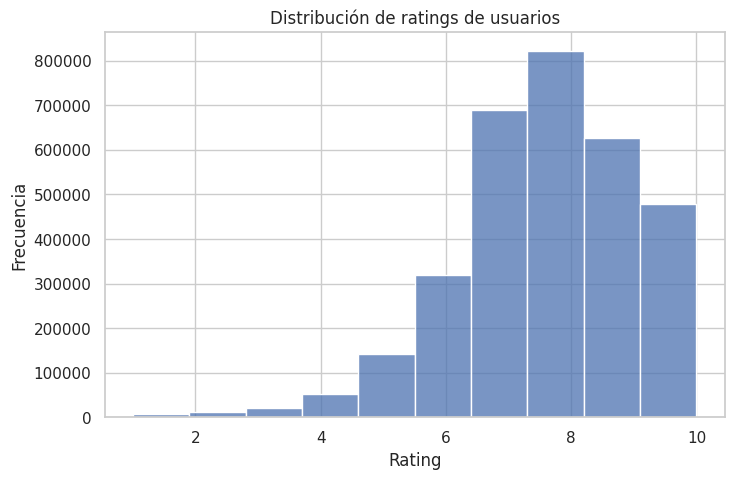

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(ratings_clean["rating"], bins=10, kde=False)
plt.title("Distribución de ratings de usuarios")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.show()

/tmp/ipython-input-4104568175.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="type", data=anime_clean, order=anime_clean["type"].value_counts().index, palette="pastel")


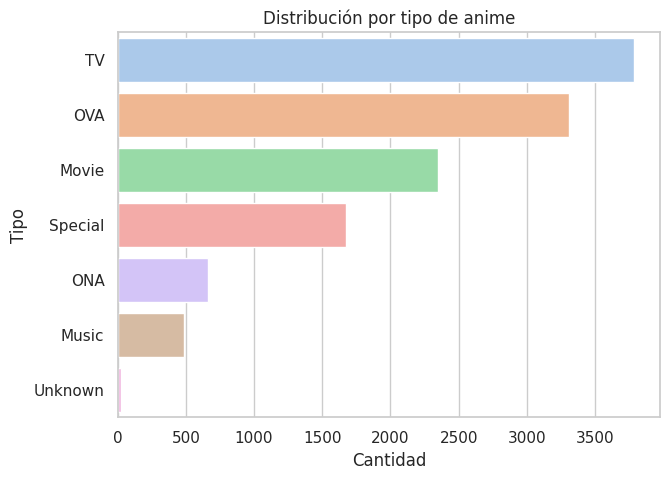

In [22]:
plt.figure(figsize=(7,5))
sns.countplot(y="type", data=anime_clean, order=anime_clean["type"].value_counts().index, palette="pastel")
plt.title("Distribución por tipo de anime")
plt.xlabel("Cantidad")
plt.ylabel("Tipo")
plt.show()

/tmp/ipython-input-1598692907.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="type", y="rating", data=anime_clean, palette="muted", order=anime_clean["type"].value_counts().index)


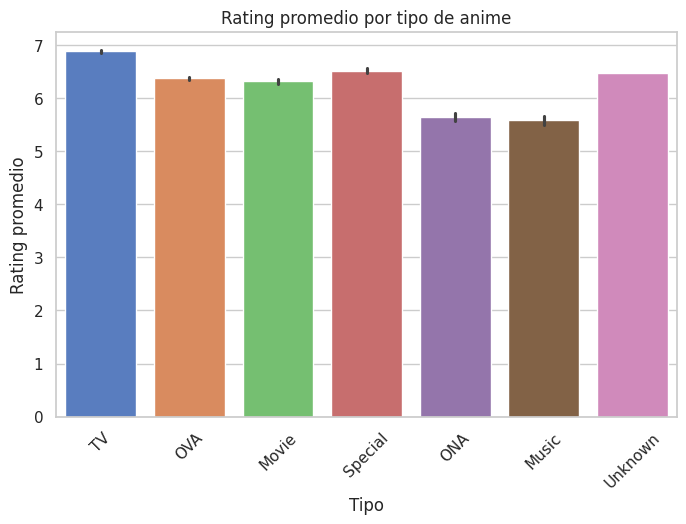

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(x="type", y="rating", data=anime_clean, palette="muted", order=anime_clean["type"].value_counts().index)
plt.title("Rating promedio por tipo de anime")
plt.xlabel("Tipo")
plt.ylabel("Rating promedio")
plt.xticks(rotation=45)
plt.show()

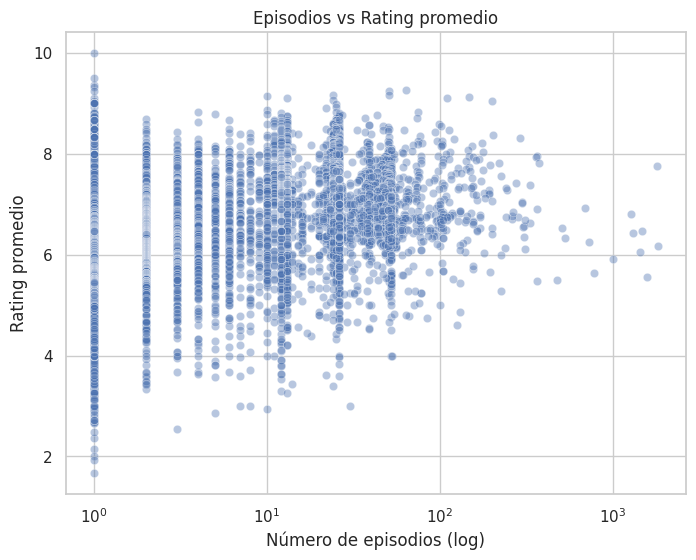

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="episodes", y="rating", data=anime_clean, alpha=0.4)
plt.title("Episodios vs Rating promedio")
plt.xlabel("Número de episodios (log)")
plt.ylabel("Rating promedio")
plt.xscale("log")  # muchos animes tienen 1 o miles de episodios, log ayuda a visualizar
plt.show()

/tmp/ipython-input-28317136.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="name", x="members", data=top_members, palette="magma")


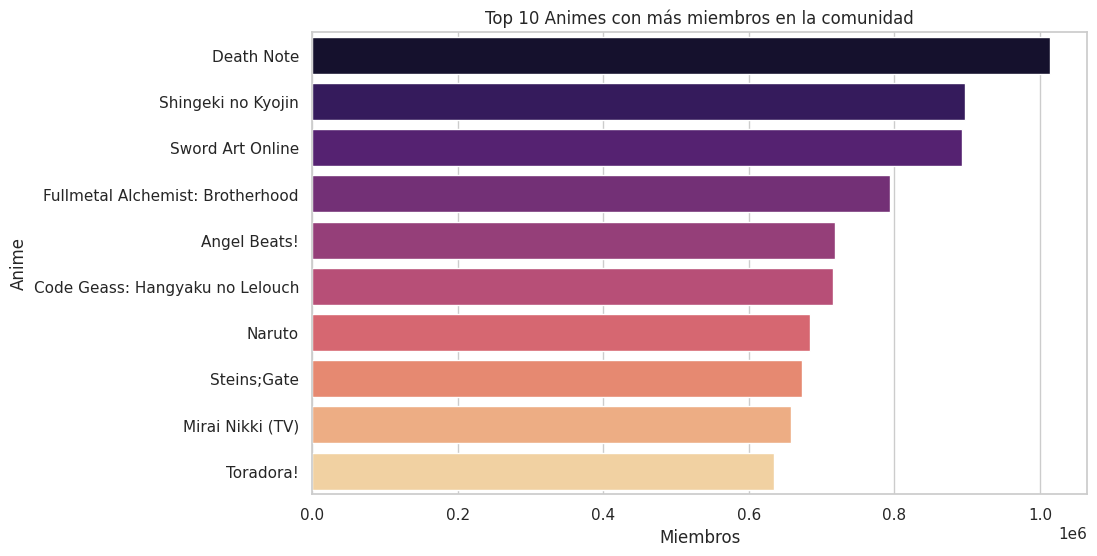

In [25]:
top_members = anime_clean.sort_values("members", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(y="name", x="members", data=top_members, palette="magma")
plt.title("Top 10 Animes con más miembros en la comunidad")
plt.xlabel("Miembros")
plt.ylabel("Anime")
plt.show()

In [27]:
#Limpieza de Ratings
print("Rango de ratings:", ratings_clean["rating"].min(), "→", ratings_clean["rating"].max())


Rango de ratings: 1 → 10


In [28]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split

In [30]:
ratings_filt = ratings_clean.copy()

In [31]:
# Mapas id ↔ índice
user2idx = {u:i for i, u in enumerate(ratings_filt['user_id'].unique())}
item2idx = {a:i for i, a in enumerate(ratings_filt['anime_id'].unique())}
idx2user = {i:u for u,i in user2idx.items()}
idx2item = {i:a for a,i in item2idx.items()}

# Vectores de índices
ui = ratings_filt['user_id'].map(user2idx).values
ii = ratings_filt['anime_id'].map(item2idx).values
rr = ratings_filt['rating'].astype(np.float32).values

n_users = len(user2idx)
n_items = len(item2idx)
print(f"users={n_users}, items={n_items}, ratings={len(rr)}")

# Matriz dispersa users x items
R = csr_matrix((rr, (ui, ii)), shape=(n_users, n_items))

users=67069, items=9315, ratings=3168710


In [32]:
# Media por usuario (ignorando ceros)
user_sum = np.array(R.sum(axis=1)).ravel()
user_nnz = np.diff(R.indptr)  # nº de ítems calificados por usuario
user_mean = np.divide(user_sum, user_nnz, out=np.zeros_like(user_sum), where=user_nnz!=0)

# R_centered = R - mean_u (en posiciones no-cero)
R_centered = R.copy().tocsr()
for u in range(n_users):
    start, end = R_centered.indptr[u], R_centered.indptr[u+1]
    if end > start:
        R_centered.data[start:end] -= user_mean[u]

In [33]:
K = 50  # vecinos a considerar
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=K, n_jobs=-1)
knn.fit(R_centered)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=50)

In [34]:
def recomendar_para_usuario(user_id, topN=10, k=K, min_neighbors=2):
    """
    Retorna topN (anime_id, score) para user_id usando User-Based CF.
    """
    if user_id not in user2idx:
        raise ValueError("user_id no existe en el conjunto filtrado.")

    u_idx = user2idx[user_id]

    # Vecinos de u
    distances, neighbor_idx = knn.kneighbors(R_centered[u_idx], n_neighbors=k)
    # Similaridad = 1 - distancia de coseno
    sims = 1.0 - distances.ravel()
    neighs = neighbor_idx.ravel()

    # Ítems ya vistos por u
    start_u, end_u = R.indptr[u_idx], R.indptr[u_idx+1]
    seen_items = set(R.indices[start_u:end_u])

    # Candidatos: ítems vistos por los vecinos pero no por u
    candidate_items = set()
    for v_idx in neighs:
        sv, ev = R.indptr[v_idx], R.indptr[v_idx+1]
        candidate_items.update(R.indices[sv:ev])
    candidate_items.difference_update(seen_items)

    # Pre-cálculos: medias de vecinos
    neigh_means = user_mean[neighs]

    # Predicción para cada candidato
    preds = []
    for i_idx in candidate_items:
        # ratings de vecinos para item i
        num, den = 0.0, 0.0
        count_v = 0
        for s, v_idx, mv in zip(sims, neighs, neigh_means):
            sv, ev = R.indptr[v_idx], R.indptr[v_idx+1]
            # buscar si v calificó i (búsqueda binaria en el segmento del usuario v)
            idx_slice = R.indices[sv:ev]
            pos = np.searchsorted(idx_slice, i_idx)
            if pos < len(idx_slice) and idx_slice[pos] == i_idx:
                rv = R.data[sv + pos]
                num += s * (rv - mv)
                den += abs(s)
                count_v += 1

        if count_v >= min_neighbors and den > 1e-9:
            r_hat = user_mean[u_idx] + (num / den)
            # recortar al rango válido
            r_hat = float(np.clip(r_hat, 1.0, 10.0))
            preds.append((i_idx, r_hat))

    # Ordenar y mapear a ids/nombres
    preds.sort(key=lambda x: x[1], reverse=True)
    top = preds[:topN]

    # Convertir a anime_id y nombre
    rows = []
    for i_idx, score in top:
        aid = idx2item[i_idx]
        name = anime_clean.loc[anime_clean['anime_id']==aid, 'name'].values
        name = name[0] if len(name)>0 else f"anime_{aid}"
        rows.append((aid, name, score))

    recs_df = pd.DataFrame(rows, columns=['anime_id', 'name', 'pred_rating'])
    return recs_df


In [43]:
#Ejemplo de uso
SOME_USER_ID = 73424
print(SOME_USER_ID in ratings_filt['user_id'].values)  # True = sí existe
recs = recomendar_para_usuario(SOME_USER_ID, topN=10, k=K, min_neighbors=2)
recs

True


,anime_id,name,pred_rating
0,974,Dead Leaves,9.087878
1,323,Mousou Dairinin,9.079361
2,1566,Ghost in the Shell: Stand Alone Complex - Soli...,9.007042
3,1943,Paprika,8.877348
4,4181,Clannad: After Story,8.847952
5,6347,Baka to Test to Shoukanjuu,8.821844
6,45,Rurouni Kenshin: Meiji Kenkaku Romantan,8.805241
7,7311,Suzumiya Haruhi no Shoushitsu,8.799685
8,9253,Steins;Gate,8.775055
9,6045,Kimi ni Todoke,8.630126


In [45]:
import numpy as np
import pandas as pd

# Parámetros
N_SAMPLE = 1000
MIN_PER_STRATUM = 100   # mínimo por estrato (ajusta si quieres)
RANDOM_STATE = 42

# 1) calcular activity por usuario
user_counts = ratings_filt.groupby('user_id')['anime_id'].count().rename('n_ratings').reset_index()

# 2) crear 3 estratos por quantiles: low, mid, high
user_counts['stratum'] = pd.qcut(user_counts['n_ratings'], q=3, labels=['low','mid','high'])

# 3) determinar cuántos por estrato: proporcional a su tamaño pero con mínimo
stratum_sizes = user_counts['stratum'].value_counts().to_dict()
# proporcional
proportions = {s: (stratum_sizes[s]/len(user_counts)) for s in stratum_sizes}
sample_counts = {s: max(MIN_PER_STRATUM, int(proportions[s]*N_SAMPLE)) for s in stratum_sizes}

# ajustar suma a N_SAMPLE (si pasó por mínimos)
total = sum(sample_counts.values())
if total != N_SAMPLE:
    # corregir distribuyendo el exceso o déficit en 'mid'
    diff = N_SAMPLE - total
    sample_counts['mid'] = sample_counts.get('mid',0) + diff

# 4) muestreo estratificado
sampled_users = []
for s, cnt in sample_counts.items():
    users_in_s = user_counts[user_counts['stratum']==s]['user_id']
    if len(users_in_s) <= cnt:
        sampled = users_in_s.tolist()
    else:
        sampled = users_in_s.sample(cnt, random_state=RANDOM_STATE).tolist()
    sampled_users.extend(sampled)

sampled_users = list(set(sampled_users))  # dedup por si acaso
len(sampled_users)


1000

In [47]:
# ======================
# Leave-One-Out (versión con sample de usuarios)
# ======================

# 1) Tomar muestra de 1000 usuarios para evaluación rápida
usuarios_sample = ratings_filt['user_id'].drop_duplicates().sample(1000, random_state=42)
df_sample = ratings_filt[ratings_filt['user_id'].isin(usuarios_sample)].reset_index(drop=True)

print("Tamaño muestra:", df_sample.shape)

# 2) Crear Leave-One-Out dentro de la muestra barajada
df_shuf = df_sample.sample(frac=1.0, random_state=42).reset_index(drop=True)
test_idx = df_shuf.groupby('user_id').head(1).index
test_df_sample = df_shuf.loc[test_idx].reset_index(drop=True)
train_df_sample = df_shuf.drop(test_idx).reset_index(drop=True)

print("Train:", train_df_sample.shape, "Test:", test_df_sample.shape)

# 3) Reconstruir matrices con TRAIN
ui_tr = train_df_sample['user_id'].map(user2idx, na_action='ignore')
ii_tr = train_df_sample['anime_id'].map(item2idx, na_action='ignore')
mask = ui_tr.notna() & ii_tr.notna()
ui_tr = ui_tr[mask].astype(int).values
ii_tr = ii_tr[mask].astype(int).values
rr_tr = train_df_sample.loc[mask, 'rating'].astype(np.float32).values

R_tr = csr_matrix((rr_tr, (ui_tr, ii_tr)), shape=(n_users, n_items))

# 4) Recalcular medias y centrado con TRAIN
user_sum_tr = np.array(R_tr.sum(axis=1)).ravel()
user_nnz_tr = np.diff(R_tr.indptr)
user_mean_tr = np.divide(user_sum_tr, user_nnz_tr, out=np.zeros_like(user_sum_tr), where=user_nnz_tr!=0)

R_c_tr = R_tr.copy().tocsr()
for u in range(n_users):
    st, en = R_c_tr.indptr[u], R_c_tr.indptr[u+1]
    if en > st:
        R_c_tr.data[st:en] -= user_mean_tr[u]

# 5) KNN con TRAIN
knn_tr = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=K, n_jobs=-1)
knn_tr.fit(R_c_tr)

# 6) Función de predicción para un par (u, i)
def predict_one(u_id, a_id, k=K):
    if (u_id not in user2idx) or (a_id not in item2idx):
        return np.nan
    u_idx = user2idx[u_id]
    i_idx = item2idx[a_id]

    distances, neighbor_idx = knn_tr.kneighbors(R_c_tr[u_idx], n_neighbors=k)
    sims = 1.0 - distances.ravel()
    neighs = neighbor_idx.ravel()

    num, den = 0.0, 0.0
    for s, v_idx in zip(sims, neighs):
        sv, ev = R_tr.indptr[v_idx], R_tr.indptr[v_idx+1]
        idx_slice = R_tr.indices[sv:ev]
        pos = np.searchsorted(idx_slice, i_idx)
        if pos < len(idx_slice) and idx_slice[pos] == i_idx:
            rv = R_tr.data[sv + pos]
            num += s * (rv - user_mean_tr[v_idx])
            den += abs(s)

    if den < 1e-9:
        return np.nan
    r_hat = user_mean_tr[u_idx] + num/den
    return float(np.clip(r_hat, 1.0, 10.0))

# 7) Evaluación en TEST
y_true, y_pred = [], []
for row in test_df_sample.itertuples(index=False):
    pr = predict_one(row.user_id, row.anime_id, k=K)
    if not np.isnan(pr):
        y_true.append(row.rating)
        y_pred.append(pr)

if len(y_pred) > 0:
    rmse = np.sqrt(np.mean((np.array(y_true) - np.array(y_pred))**2))
    print(f"RMSE (leave-one-out con {len(y_pred)} predicciones): {rmse:.4f}")
else:
    print("No se pudieron generar predicciones en el test (prueba ajustando K o filtros).")


Tamaño muestra: (43862, 3)
Train: (42862, 3) Test: (1000, 3)
RMSE (leave-one-out con 671 predicciones): 1.3530


In [53]:
# Crear una versión mejorada del markdown con estructura formal
formal_doc = """# Sistema de Recomendación de Anime con Filtrado Colaborativo (User-Based)

## 1. Introducción
El presente proyecto implementa un sistema de recomendación de animes utilizando **Filtrado Colaborativo Basado en Usuarios (User-Based CF)**.
El objetivo es predecir la valoración que un usuario podría asignar a un anime no visto, y generar recomendaciones personalizadas a partir de las preferencias de otros usuarios similares.

Los datos fueron extraídos de Kaggle e incluyen:
- **anime.csv**: información de animes (id, nombre, género, tipo, episodios, rating promedio y número de miembros).
- **rating.csv**: calificaciones de usuarios sobre los animes, en una escala de 1 a 10, con -1 indicando que el anime fue visto pero no calificado.

## 2. Metodología

### 2.1 Preparación de los Datos
1. **Carga de datasets** en Pandas.
2. **Reducción del dataset de ratings** en un 50% para manejar la memoria en Google Colab (originalmente más de 7.8 millones de filas).
3. **Análisis exploratorio (EDA)** para entender la estructura, distribución de valores y datos faltantes.
4. **Limpieza de datos**:
   - Sustitución de valores faltantes en `rating` (anime.csv) por la media global.
   - Reemplazo de valores 'Unknown' en `episodes` por `0` y conversión a enteros.
   - Eliminación de géneros nulos o reemplazo por `'Unknown'`.
   - Verificación de duplicados.

### 2.2 Análisis Exploratorio
Se realizaron análisis gráficos y estadísticos para:
- Distribución de calificaciones.
- Popularidad de los géneros.
- Relación entre número de miembros y calificación promedio.
- Proporción de tipos de anime (TV, Movie, OVA, etc.).

### 2.3 Construcción de la Matriz Usuario × Ítem
- Se mapearon `user_id` y `anime_id` a índices internos.
- Se construyó una **matriz dispersa (sparse matrix)** con usuarios en las filas y animes en las columnas.
- Se calculó la **media por usuario** y se aplicó un centrado para normalizar las calificaciones.

### 2.4 Algoritmo de Recomendación
- Se utilizó **k-Nearest Neighbors (kNN)** con métrica de coseno para encontrar usuarios similares.
- El número de vecinos (`K`) se definió como un hiperparámetro configurable.
- Para generar predicciones:
  - Se ajustó la predicción de un usuario considerando las desviaciones de sus vecinos respecto a sus medias.
  - Se acotaron las predicciones al rango [1, 10].

### 2.5 Evaluación del Modelo
Se utilizó la estrategia **Leave-One-Out Cross-Validation**:
- Para cada usuario, se reservó 1 calificación como conjunto de prueba.
- Se entrenó el modelo con el resto.
- Se calcularon predicciones sobre el test y se evaluó el **RMSE (Root Mean Square Error)**.

Para reducir tiempo de cómputo en Colab:
- Se seleccionó una muestra de **1000 usuarios** aleatoriamente.
- Esto resultó en ~43,862 interacciones (ratings) para la evaluación.

## 3. Resultados

- **Tamaño muestra**: 43,862 ratings de 1000 usuarios.
- **Train**: 42,862 ratings.
- **Test**: 1,000 ratings (1 por usuario).
- **Predicciones generadas**: 671 (67% de cobertura).
- **RMSE**: 1.3530.

### Interpretación del RMSE
- El RMSE está en una escala de 1 a 10 (misma que los ratings).
- Un error promedio de **1.35 equivale a ~13% del rango total**, lo cual es razonable para un modelo basado en filtrado colaborativo puro.
- Este desempeño indica que las recomendaciones tienen cierta precisión, aunque pueden mejorarse con técnicas más avanzadas.

## 4. Discusión y Mejoras Futuras

- **Cobertura**: El modelo no siempre puede predecir, especialmente cuando los usuarios no tienen vecinos con suficientes calificaciones comunes.
- **Posibles mejoras**:
  1. Ajustar el número de vecinos (`K`) y evaluar el RMSE en función de este parámetro.
  2. Implementar **modelos de factorización matricial** (SVD, ALS, etc.), que suelen superar al kNN en precisión y escalabilidad.
  3. Desarrollar un **modelo híbrido** que combine filtrado colaborativo con contenido (género, tipo, etc.).
  4. Aplicar técnicas de reducción de dimensionalidad o embeddings.

## 5. Conclusiones
- Se logró implementar un **sistema de recomendación basado en usuarios** funcional en un dataset de gran tamaño.
- El modelo presenta un desempeño aceptable (**RMSE ≈ 1.35**) en una muestra de usuarios.
- El enfoque resulta útil como **prototipo inicial**, pero puede beneficiarse de métodos más avanzados para incrementar precisión y cobertura.

---

## 6. Referencias
- Kaggle Dataset: [Anime Recommendations Database](https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database)
- Aggarwal, C. C. (2016). *Recommender Systems: The Textbook*. Springer.
- Ricci, F., Rokach, L., & Shapira, B. (2015). *Recommender Systems Handbook*. Springer.
"""

# Guardar el documento formal en el directorio actual de Colab
formal_filename = "SR_Trabajo_Final_Formal.md"
with open(formal_filename, "w", encoding="utf-8") as f:
    f.write(formal_doc)

print(f"✅ Documentación guardada como {formal_filename}")


✅ Documentación guardada como SR_Trabajo_Final_Formal.md


In [54]:
from google.colab import files
files.download("SR_Trabajo_Final_Formal.md")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>